In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.ensemble import BalancedRandomForestClassifier
import pandas as pd
import tensorflow as tf
import glob
import numpy as np
import plotly.graph_objs as go
import json
import re
from sqlalchemy import create_engine
import psycopg2
import sys
sys.path.append('/content/drive/MyDrive/Crypto-Pricing')
from config import db_password


In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.metrics import classification_report_imbalanced

In [3]:
columns = [
    "percentageChangeMtdUsd", "percentageDownFromAth", "breakevenMultiple", "percentageUpFromCycleLow", "volatility30d", 
    "volatility90d", "circulatingSupply", "priceUsd", "currentMarketcap"
]
target = ['percentageChangeYtdUsd']

In [4]:
file_path = "messari.csv"
crypto_data_df = pd.read_csv(file_path, index_col=0)
crypto_data_df

,symbol,id,percentageChangeMtdUsd,percentageChangeYtdUsd,athTimestamp,percentageDownFromAth,breakevenMultiple,cycleLowTimestamp,percentageUpFromCycleLow,volatility30d,volatility90d,circulatingSupply,priceUsd,currentMarketcap
name,,,,,,,,,,,,,,
Bitcoin,BTC,1e31218a-e44e-4285-820c-8282ee222035,-5.287502,8.000180,1.618380e+09,50.868580,2.035357,1.624367e+09,8.602813,0.729111,0.937165,1.876916e+07,31685.847960,5.940000e+11
Ethereum,ETH,21c795f5-1bfd-40c3-858e-e9d7e820c6d0,-7.393947,167.083032,1.620788e+09,54.990931,2.221774,1.624367e+09,12.920607,0.993513,1.373436,1.158639e+08,1946.103537,2.250000e+11
Tether,USDT,51f8ea5e-f426-4f40-939a-db7e05495374,0.019689,-0.073973,1.503090e+09,63.120988,2.711569,1.542298e+09,4.691042,0.019839,0.052247,6.429436e+10,1.000748,6.432851e+10
BNB,BNB,7dc551ba-cfed-4437-a027-386044415e3e,-0.388361,656.663373,1.620626e+09,58.165982,2.390399,1.621786e+09,27.704637,1.075169,1.520353,1.681370e+08,286.400131,4.815812e+10
Cardano,ADA,362f0140-ecdd-4205-b8a0-36f0fd5d8167,-13.260598,558.434873,1.621152e+09,52.373198,2.099658,1.624367e+09,13.966892,0.969663,1.491604,3.114973e+10,1.155717,3.599993e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZAIF,ZAIF,2bd6afda-0d20-4e5f-b74c-afad5c48c990,-4.803669,-21.996599,1.518829e+09,93.480073,15.337594,1.593320e+09,66.392864,3.089121,2.456992,3.683853e+06,0.001586,5.844358e+03
Phalanx,PXL,b12cab57-c19e-43ef-b488-6de99280d802,-13.956049,-88.084156,1.617001e+09,98.891820,90.238077,1.626646e+09,30.067588,6.016550,3.785536,1.804501e+06,0.002876,5.188948e+03
Project-X,NANOX,fb1c1b84-30a8-40a7-82d4-a5c3de9e76a3,-12.729873,5.115108,1.516500e+09,96.921653,32.484962,1.584425e+09,432.248002,2.109049,2.799559,7.826400e-02,29224.094400,2.287195e+03


In [5]:
crypto_data_df.drop(['symbol', 'id', 'athTimestamp', 'cycleLowTimestamp'], axis=1, inplace=True)

In [6]:
crypto_data_df

,percentageChangeMtdUsd,percentageChangeYtdUsd,percentageDownFromAth,breakevenMultiple,percentageUpFromCycleLow,volatility30d,volatility90d,circulatingSupply,priceUsd,currentMarketcap
name,,,,,,,,,,
Bitcoin,-5.287502,8.000180,50.868580,2.035357,8.602813,0.729111,0.937165,1.876916e+07,31685.847960,5.940000e+11
Ethereum,-7.393947,167.083032,54.990931,2.221774,12.920607,0.993513,1.373436,1.158639e+08,1946.103537,2.250000e+11
Tether,0.019689,-0.073973,63.120988,2.711569,4.691042,0.019839,0.052247,6.429436e+10,1.000748,6.432851e+10
BNB,-0.388361,656.663373,58.165982,2.390399,27.704637,1.075169,1.520353,1.681370e+08,286.400131,4.815812e+10
Cardano,-13.260598,558.434873,52.373198,2.099658,13.966892,0.969663,1.491604,3.114973e+10,1.155717,3.599993e+10
...,...,...,...,...,...,...,...,...,...,...
ZAIF,-4.803669,-21.996599,93.480073,15.337594,66.392864,3.089121,2.456992,3.683853e+06,0.001586,5.844358e+03
Phalanx,-13.956049,-88.084156,98.891820,90.238077,30.067588,6.016550,3.785536,1.804501e+06,0.002876,5.188948e+03
Project-X,-12.729873,5.115108,96.921653,32.484962,432.248002,2.109049,2.799559,7.826400e-02,29224.094400,2.287195e+03


In [7]:
crypto_data_df.dtypes

percentageChangeMtdUsd      float64
percentageChangeYtdUsd      float64
percentageDownFromAth       float64
breakevenMultiple           float64
percentageUpFromCycleLow    float64
volatility30d               float64
volatility90d               float64
circulatingSupply           float64
priceUsd                    float64
currentMarketcap            float64
dtype: object

In [8]:
crypto_data_df = pd.get_dummies(crypto_data_df)
crypto_data_df.head(5)

,percentageChangeMtdUsd,percentageChangeYtdUsd,percentageDownFromAth,breakevenMultiple,percentageUpFromCycleLow,volatility30d,volatility90d,circulatingSupply,priceUsd,currentMarketcap
name,,,,,,,,,,
Bitcoin,-5.287502,8.000180,50.868580,2.035357,8.602813,0.729111,0.937165,1.876916e+07,31685.847960,5.940000e+11
Ethereum,-7.393947,167.083032,54.990931,2.221774,12.920607,0.993513,1.373436,1.158639e+08,1946.103537,2.250000e+11
Tether,0.019689,-0.073973,63.120988,2.711569,4.691042,0.019839,0.052247,6.429436e+10,1.000748,6.432851e+10
BNB,-0.388361,656.663373,58.165982,2.390399,27.704637,1.075169,1.520353,1.681370e+08,286.400131,4.815812e+10
Cardano,-13.260598,558.434873,52.373198,2.099658,13.966892,0.969663,1.491604,3.114973e+10,1.155717,3.599993e+10


In [9]:
import numpy as np
# Labels are the values we want to predict
labels = np.array(crypto_data_df['percentageChangeYtdUsd'])

# Remove the labels from the features
# axis 1 refers to the columns
crypto_data_df= crypto_data_df.drop('percentageChangeYtdUsd', axis = 1)

# Saving feature names for later use
feature_list = list(crypto_data_df.columns)

# Convert to numpy array
crypto_data_df = np.array(crypto_data_df)

In [10]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_crypto_data_df, test_crypto_data_df, train_labels, test_labels = train_test_split(crypto_data_df, labels, test_size = 0.25,
                                                                           random_state = 100)

In [11]:
# The baseline predictions are the historical averages
baseline_preds = test_crypto_data_df[:, feature_list.index('percentageDownFromAth')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  390.59 degrees.


In [12]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 150, random_state = 42)
# Train the model on training data
rf.fit(train_crypto_data_df, train_labels);

In [13]:
rf_new = RandomForestRegressor(n_estimators = 150, criterion = 'mae', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [17]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_crypto_data_df)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 436.76 degrees.


In [42]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 10 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 71.23 %.


In [16]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: circulatingSupply    Importance: 0.27
Variable: currentMarketcap     Importance: 0.19
Variable: percentageChangeMtdUsd Importance: 0.17
Variable: percentageUpFromCycleLow Importance: 0.11
Variable: volatility90d        Importance: 0.07
Variable: volatility30d        Importance: 0.06
Variable: breakevenMultiple    Importance: 0.05
Variable: priceUsd             Importance: 0.04
Variable: percentageDownFromAth Importance: 0.03


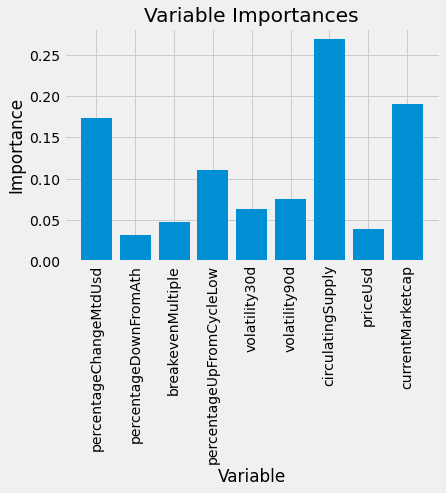

In [35]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["high_risk", "low_risk"], columns=["Predicted_high_risk", "Predicted_low_risk"])
cm_df